In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AIDLE/data/test.csv")
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AIDLE/data/train.csv")

### Remove ['Channel'] column since it seems unnecessary

In [4]:
train = train.drop(['Channel'], axis=1)
print(train.shape)
train.head()

(800, 10)


,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English
1,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English
2,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese
3,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,English
4,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English


In [5]:
test = test.drop(['Channel'], axis=1)
print(test.shape)
test.head()

(200, 9)


,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Views gained,Partnered,Mature,Language
0,154332060,27105,29983,5864,308815,8255635,0,0,Russian
1,154277370,87375,9437,1759,151886,3019137,1,1,French
2,154125945,77475,9460,2106,411346,4832180,1,0,Turkish
3,153988380,83325,11200,1787,272635,4345590,1,0,French
4,153963765,110910,14329,1281,106365,1449834,1,1,English


# Pretraining

In [6]:
train.dtypes

Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                int64
Mature                   int64
Language                object
dtype: object

In [7]:
train.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
count,8.000000e+02,800.000000,800.000000,800.000000,8.000000e+02,8.000000e+02,8.000000e+02,800.000000,800.000000
mean,4.888771e+08,124526.512500,42307.343750,5402.686250,6.449188e+05,2.299286e+05,1.335486e+07,0.986250,0.217500
std,5.940109e+08,87625.117626,65691.400669,9180.191618,8.733633e+05,3.704139e+05,2.732344e+07,0.116524,0.412804
min,1.545242e+08,6195.000000,1182.000000,313.000000,3.660000e+03,-1.577200e+04,1.757880e+05,0.000000,0.000000
25%,2.004784e+08,76586.250000,10800.750000,1727.750000,1.988715e+05,4.940325e+04,4.889789e+06,1.000000,0.000000
50%,2.899965e+08,110857.500000,19607.000000,2829.500000,3.660885e+05,1.142085e+05,7.630136e+06,1.000000,0.000000
75%,5.276095e+08,147663.750000,43727.000000,5465.500000,7.319040e+05,2.533272e+05,1.378407e+07,1.000000,0.000000
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08,1.000000,1.000000


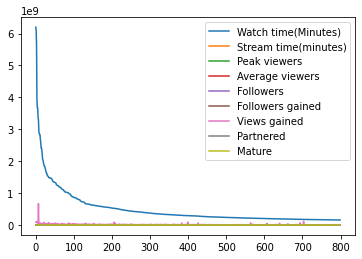

In [8]:
train.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


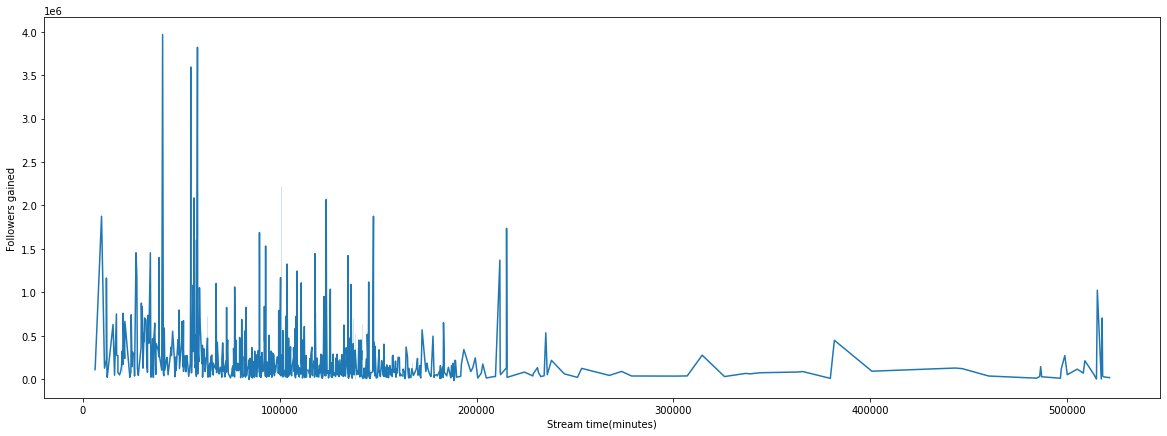

In [9]:
plt.figure(figsize=(20, 7))
sns.lineplot(train['Stream time(minutes)'], train['Followers gained'])

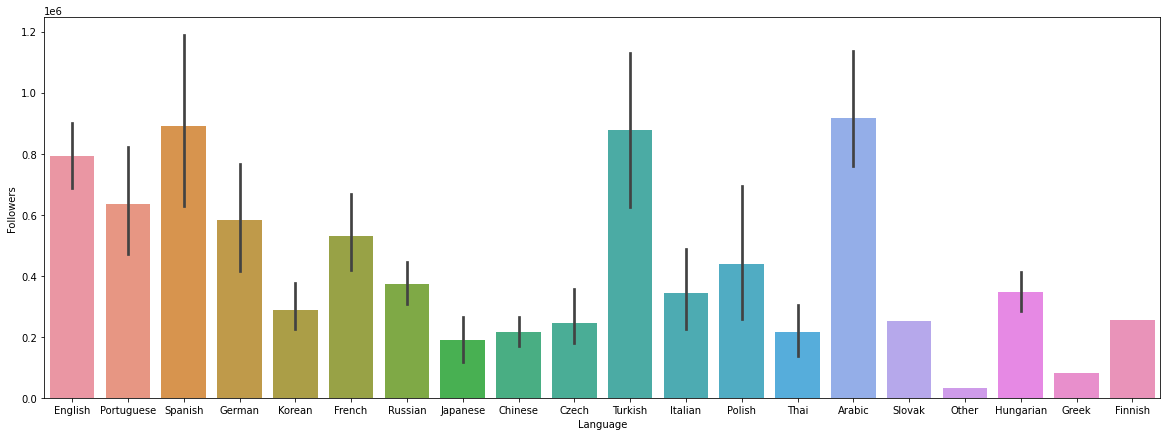

In [10]:
plt.figure(figsize = (20, 7))

sns.barplot(data=train, x="Language", y="Followers")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


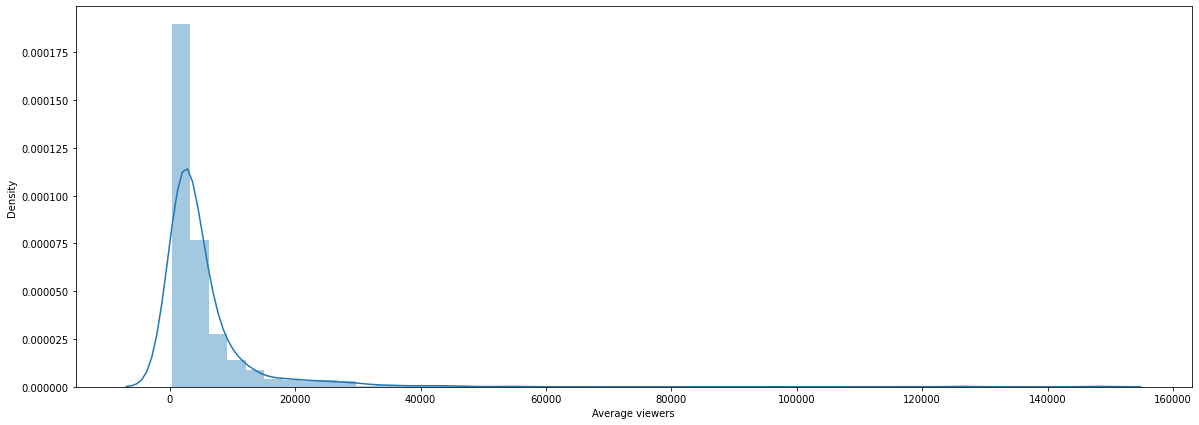

In [11]:
plt.figure(figsize = (20, 7))

sns.distplot(train["Average viewers"])

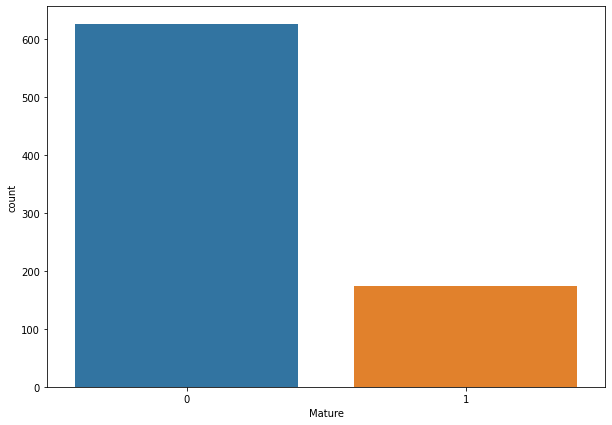

In [12]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Mature', data=train)

# Check correlation between features

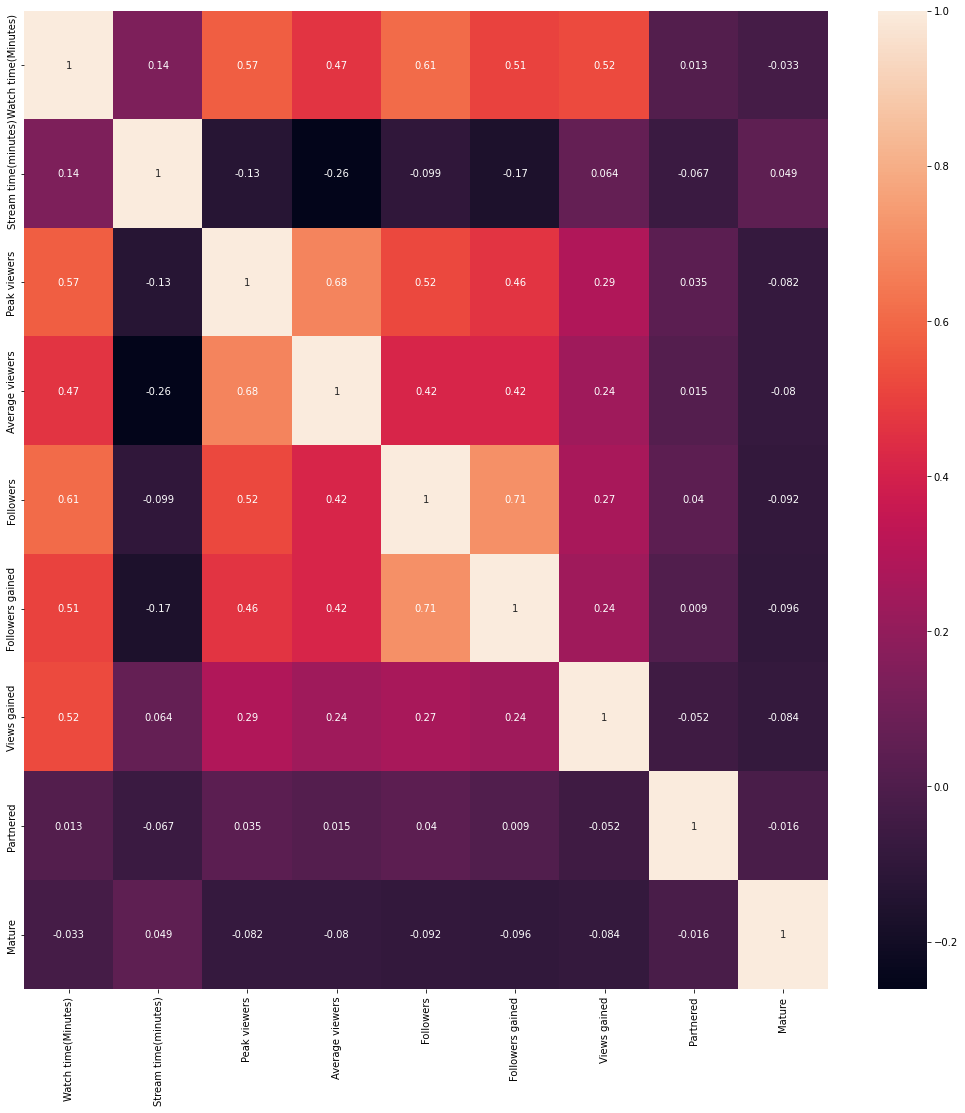

In [13]:
plt.figure(figsize=(18, 18))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [14]:
train

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English
1,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English
2,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese
3,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,English
4,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English
...,...,...,...,...,...,...,...,...,...,...
795,155187570,57120,19298,2647,179420,132867,4071398,1,0,Italian
796,154982550,87945,7136,1711,245715,122045,3621969,1,1,Portuguese
797,154727730,94275,6213,1605,114154,32991,3059244,1,0,Spanish
798,154595850,85635,8533,1777,120494,28322,3446723,1,0,Spanish


In [15]:
feature_names = [# 'Watch time(Minutes)',
                 # 'Stream time(minutes)', 
                 'Peak viewers', 
                 'Average viewers',
                 'Followers', 
                 'Views gained', 
                 ]

# feature_names = ['Watch time(Minutes)','Stream time(minutes)','Peak viewers','Average viewers','Followers','Views gained']

feature_names

['Peak viewers', 'Average viewers', 'Followers', 'Views gained']

In [16]:
# Train data feature

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(800, 4)


,Peak viewers,Average viewers,Followers,Views gained
0,222720,27716,3246298,93036735
1,310998,25610,5310163,89705964
2,387315,10976,1767635,102611607
3,300575,7714,3944850,106546942
4,285644,29602,8938903,78998587


In [17]:
# Test data feature

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(200, 4)


,Peak viewers,Average viewers,Followers,Views gained
0,29983,5864,308815,8255635
1,9437,1759,151886,3019137
2,9460,2106,411346,4832180
3,11200,1787,272635,4345590
4,14329,1281,106365,1449834


## Model Validation

In [18]:
x = train[feature_names]
print(x.shape)
x.head()

(800, 4)


,Peak viewers,Average viewers,Followers,Views gained
0,222720,27716,3246298,93036735
1,310998,25610,5310163,89705964
2,387315,10976,1767635,102611607
3,300575,7714,3944850,106546942
4,285644,29602,8938903,78998587


In [19]:
y = train['Followers gained']
print(y.shape)
y.head()

(800,)


0    1734810
1    1370184
2    1023779
3     703986
4    2068424
Name: Followers gained, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=25)

In [21]:
print("Validation train")
print("xtrain.shape: ", xtrain.shape)
print("ytrain.shape: ", ytrain.shape)

print("")

print("Validation test")
print("xtest.shape: ", xtest.shape)
print("ytest.shape: ", ytest.shape)

Validation train
xtrain.shape:  (640, 4)
ytrain.shape:  (640,)

Validation test
xtest.shape:  (160, 4)
ytest.shape:  (160,)


# Validation Prediction

## Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
dt = DecisionTreeRegressor(max_depth=5)

In [24]:
dt.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
dt_pred_train = dt.predict(xtrain)
dt_pred_test = dt.predict(xtest)

print(dt_pred_train.shape)
print(dt_pred_test.shape)

(640,)
(160,)


## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
linear = LinearRegression()
linear.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lr_pred_train = linear.predict(xtrain)
lr_pred_test = linear.predict(xtest)

print(lr_pred_train.shape)
print(lr_pred_test.shape)

(640,)
(160,)


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

# 3000 -> error got bigger
best_n_estimators = 3000

rf_model = RandomForestRegressor(n_estimators=best_n_estimators, 
                                 max_depth = 8,
                                 ccp_alpha=0.05)

rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.05, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
rf_model.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.05, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
rf_pred_train = rf_model.predict(xtrain)
rf_pred_test = rf_model.predict(xtest)

print(rf_pred_train.shape)
print(rf_pred_test.shape)

(640,)
(160,)


## XGBoost Regressor

In [33]:
from xgboost import XGBRegressor

In [34]:
xg_model = XGBRegressor(n_estimators=3000,
                        num_boost_round=100,
                        learning_rate=0.08,
                        colsample_bytree=1,
                        max_depth=8)
xg_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=3000,
             n_jobs=1, nthread=None, num_boost_round=100,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [35]:
xg_model.fit(xtrain, ytrain)

[04:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=3000,
             n_jobs=1, nthread=None, num_boost_round=100,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [36]:
xg_pred_train = xg_model.predict(xtrain)
xg_pred_test = xg_model.predict(xtest)

print(xg_pred_train.shape)
print(xg_pred_test.shape)

(640,)
(160,)


In [37]:
# MSE Calculation
import numpy as np
from sklearn.metrics import mean_squared_error

# Decision Tree Regression Model
dt_error = np.sqrt(mean_squared_error(ytest, dt_pred_test))

# Linear Regression Model
linear_error = np.sqrt(mean_squared_error(ytest, lr_pred_test))

# Random Forest Regression Model
forest_error = np.sqrt(mean_squared_error(ytest, rf_pred_test))

# Gradient Boosting Regressor Model
xg_error = np.sqrt(mean_squared_error(ytest, xg_pred_test))

print("Decision Tree RMSE: ", dt_error)
print("Linear Regression RMSE: ", linear_error)
print("Random Forest RMSE: ", forest_error)
print("XGBoost RMSE: ", xg_error)

Decision Tree RMSE:  205161.71846368894
Linear Regression RMSE:  208927.57705704682
Random Forest RMSE:  182474.27554573418
XGBoost RMSE:  189776.59130482245


## Accuracy

In [38]:
from sklearn import metrics
print("Accuracy of Random Forest: ", metrics.r2_score(ytest, rf_pred_test) * 100)

Accuracy of Random Forest:  58.814599147152336


# AFTER VALIDATION
* Fit to the actual data

In [39]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(800, 4)


,Peak viewers,Average viewers,Followers,Views gained
0,222720,27716,3246298,93036735
1,310998,25610,5310163,89705964
2,387315,10976,1767635,102611607
3,300575,7714,3944850,106546942
4,285644,29602,8938903,78998587


In [40]:
y_train = train['Followers gained']

print(y_train.shape)
y_train.head()

(800,)


0    1734810
1    1370184
2    1023779
3     703986
4    2068424
Name: Followers gained, dtype: int64

In [41]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(200, 4)


,Peak viewers,Average viewers,Followers,Views gained
0,29983,5864,308815,8255635
1,9437,1759,151886,3019137
2,9460,2106,411346,4832180
3,11200,1787,272635,4345590
4,14329,1281,106365,1449834


In [42]:
rf_model.fit(X_train, y_train)
count_predictions = rf_model.predict(X_test)

print(count_predictions.shape)
count_predictions[:10]

(200,)


array([141807.58580407,  62180.22388599, 150321.40063559,  76711.57135565,
        56299.5545677 ,  71027.95105899,  69841.48630854,  81718.16985425,
        52017.88226766, 152506.14204832])

## Submission

In [43]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AIDLE/data/sample submission.csv")
print(submission.shape)
submission.head()

(200, 2)


,Channel,Followers gained
0,97R8L3J0,0
1,6UV44QFF,0
2,2WKQZUGR,0
3,R4DGVX2D,0
4,P8YSNIOI,0


In [44]:
channel = submission['Channel']
prediction = pd.DataFrame(count_predictions)
prediction['Channel'] = channel
prediction

,0,Channel
0,141807.585804,97R8L3J0
1,62180.223886,6UV44QFF
2,150321.400636,2WKQZUGR
3,76711.571356,R4DGVX2D
4,56299.554568,P8YSNIOI
...,...,...
195,267970.162432,8Q556ABI
196,66806.723634,AXQ2XZ45
197,41396.449937,AP7UE7SZ
198,91502.051450,PNCBWRE4


In [45]:
cols = list(prediction.columns)
cols = cols[-1:] + cols[:-1]
prediction = prediction[cols]
prediction

,Channel,0
0,97R8L3J0,141807.585804
1,6UV44QFF,62180.223886
2,2WKQZUGR,150321.400636
3,R4DGVX2D,76711.571356
4,P8YSNIOI,56299.554568
...,...,...
195,8Q556ABI,267970.162432
196,AXQ2XZ45,66806.723634
197,AP7UE7SZ,41396.449937
198,PNCBWRE4,91502.051450


In [46]:
prediction.columns = ['Channel', 'Followers gained']

prediction.head()

,Channel,Followers gained
0,97R8L3J0,141807.585804
1,6UV44QFF,62180.223886
2,2WKQZUGR,150321.400636
3,R4DGVX2D,76711.571356
4,P8YSNIOI,56299.554568


In [47]:
prediction.to_csv('/content/drive/MyDrive/Colab Notebooks/AIDLE/submission.csv', index=False)